In [1]:
import numpy as np
from scipy import ndimage
import casadi as cs
import matplotlib.pyplot as plt

# change working dir
import os
os.chdir('/home/shuoyang/Documents/MATLAB/rex_hopper_python/src')
path = os.getcwd()
print(path)

from leg_parallel import Leg
import param
os.chdir('/home/shuoyang/Documents/MATLAB/rex_hopper_python/src')

/home/shuoyang/Documents/MATLAB/rex_hopper_python/src


 ## Read saved sensor data   

In [2]:
sensor_data = np.genfromtxt('sensor_data_process/data/sensor_data.csv', delimiter=',')

In [3]:
sensor_data.shape

(2700, 10)

In [4]:
sensor_data[0,:]

array([ 1.00000000e-03, -7.96480347e-01,  4.48304339e-02,  9.76225474e+00,
       -1.05881638e-02, -5.94592530e-03, -1.01271500e-02, -1.20852434e-02,
        7.63998148e-03, -2.65851492e-03])

In [5]:
# convert sensor data to arrays 
time_hist = sensor_data[:,0]
acc_hist = sensor_data[:,1:4]
gyro_hist = sensor_data[:,4:7]
joint_angle_hist = sensor_data[:,7:9]
foot_force_hist = sensor_data[:,9]

In [6]:
acc_hist.shape

(2700, 3)

In [29]:
# filter sensor data
acc_filtered = ndimage.uniform_filter1d(acc_hist, 20,0)
gyro_filtered = ndimage.uniform_filter1d(gyro_hist, 20,0)
foot_force_filtered = ndimage.uniform_filter1d(foot_force_hist, 20,0)
contact_flag = foot_force_filtered > 100

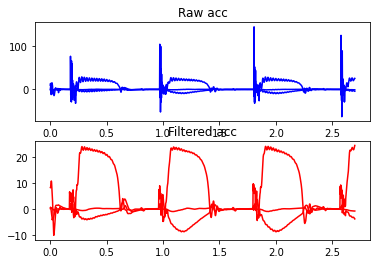

In [8]:
plt.subplot(2, 1, 1)
plt.plot(time_hist, acc_hist, color='blue')
plt.title("Raw acc")
# plt.xlim([1, 1.5])
# plt.ylim([-30, 30])

plt.subplot(2, 1, 2)
plt.plot(time_hist, acc_filtered, color='red')
plt.title("Filtered acc")
# plt.xlim([1, 1.5])
# plt.ylim([-30, 30])

plt.show()

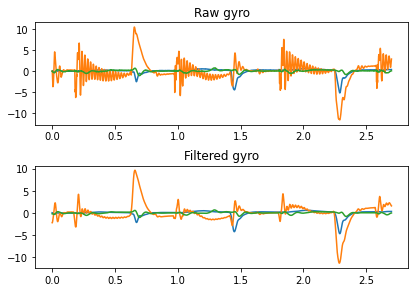

In [9]:
fig, ax = plt.subplots(2, 1)
fig.tight_layout(h_pad=2)
ax[0].plot(time_hist, gyro_hist)
ax[0].title.set_text("Raw gyro")
# plt.xlim([1, 1.5])
# plt.ylim([-30, 30])

ax[1].plot(time_hist, gyro_filtered)
ax[1].title.set_text("Filtered gyro")
# plt.xlim([1, 1.5])
# plt.ylim([-30, 30])

plt.show()

The joint angle can be converted to leg position using Leg's function. Need to add q_calibration

In [21]:
l = Leg(dt=1e-3, model=param.design_rw, recalc=False)
leg_position_hist = np.zeros((joint_angle_hist.shape[0],3))
init_q = [-30 * np.pi / 180, -120 * np.pi / 180, -150 * np.pi / 180, 120 * np.pi / 180]
for i in range(joint_angle_hist.shape[0]):
    leg_position_hist[i:i+1,:] = l.position([joint_angle_hist[i,0]+init_q[0],0,joint_angle_hist[i,1]+init_q[2]]).T 

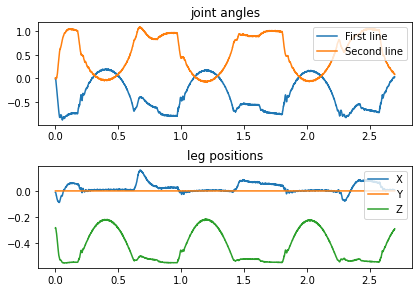

In [22]:
fig, ax = plt.subplots(2, 1)
fig.tight_layout(h_pad=2)
ax[0].plot(time_hist, joint_angle_hist)
ax[0].title.set_text("joint angles")
ax[0].legend(['First line', 'Second line'],loc='upper right')
# plt.xlim([1, 1.5])
# plt.ylim([-30, 30])

ax[1].plot(time_hist, leg_position_hist)
ax[1].title.set_text("leg positions")
ax[1].legend(['X','Y','Z'],loc='upper right')
# plt.xlim([1, 1.5])
# plt.ylim([-30, 30])

plt.show()

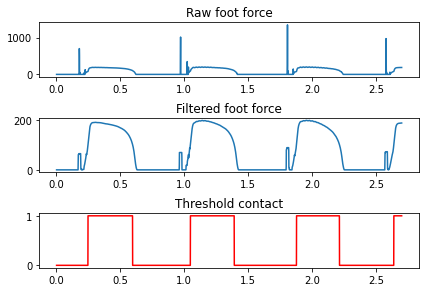

In [31]:
fig, ax = plt.subplots(3, 1)
fig.tight_layout(h_pad=2)
ax[0].plot(time_hist, foot_force_hist)
ax[0].title.set_text("Raw foot force")
# plt.xlim([1, 1.5])
# plt.ylim([-30, 30])

ax[1].plot(time_hist, foot_force_filtered)
ax[1].title.set_text("Filtered foot force")
# plt.xlim([1, 1.5])
# plt.ylim([-30, 30])

ax[2].plot(time_hist, contact_flag, color='red')
ax[2].title.set_text("Threshold contact")
plt.show()

save data again into csv again 

1      2  3  4   5  6  7    8  9         10           11       12  13  14 
time    acc         gyro     angle   foot force      flag        leg position

In [33]:
sensor_data = np.hstack([time_hist[:, None],acc_filtered,gyro_filtered,joint_angle_hist,foot_force_filtered[:, None],contact_flag[:, None],leg_position_hist])
np.savetxt("sensor_data_process/data/filtered_sensor_data.csv", sensor_data, delimiter=",") 